 # Принятие решений в бизнесе
 
 ---

## Описание проекта

**Задачи проекта**

**1. Приоритизация гипотез.**

Провести приоритизацию гипотез, предоставленных отделом маркетинга.

**2. Анализ A/B-теста.**

Проанализировать проведенные A/B-тесты и по результатам принять одно из решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Описание данных**

Данные для приоритизации гипотез:

Файл `/datasets/hypothesis.csv`.
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.

Данные для анализа A/B-теста:

Файл `/datasets/orders.csv`
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`.
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез

### Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

import warnings

In [2]:
try:
    hypothesis = pd.read_csv('ab_tests_data/hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
warnings.filterwarnings(action='ignore')

In [4]:
pd.options.display.max_colwidth = 100

In [5]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
hypothesis['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

### Приоритизация гипотез

Применим фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

In [7]:
# ICE = Impact * Confidence / Efforts
ice = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
ice.sort_values(ascending = False)

8    16.200000
0    13.333333
7    11.200000
6     8.000000
2     7.000000
1     2.000000
5     1.333333
3     1.125000
4     1.000000
dtype: float64

Согласно методу ICE, наиболее приоритетной гипотезой является гипотеза № 8 - "*Запустить акцию, дающую скидку на товар в день рождения*". Следующие по проиоритету - "*Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей*" и "*Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*".

**Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.**

In [8]:
# RICE = Reach * Impact * Confidence / Efforts
ice = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
ice.sort_values(ascending = False)

7    112.0
2     56.0
0     40.0
6     40.0
8     16.2
3      9.0
1      4.0
5      4.0
4      3.0
dtype: float64

Согласно методу RICE, наиболее приоритетной гипотезой является гипотеза №7 - '*Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*'.Следующие по проиоритету - "*Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа*" и "*Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей*".

Порядок приоритета гипотез изменился, поскольку у гипотезы №8 куда больше охват аудитории, чем у гипотез №7, 2, 0 и 6.

Гипотеза №7 применима только для уже зарегистрировавшихся пользователей раз в год, в то время как гипотезы №7, 2, 0 и 6 применимы ко всем посетителям сайта.

## Анализ A/B-теста

### Загрузка данных

In [9]:
try:
    orders, visitors = (
        pd.read_csv('ab_tests_data/orders.csv'),
        pd.read_csv('ab_tests_data/visitors.csv')
    )
except:
    orders, visitors = (
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )

In [10]:
orders.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


In [11]:
visitors.head(2)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


In [12]:
orders.info() , visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


(None, None)

In [13]:
# для удобства переименуем колонки
orders.rename(columns = {'transactionId' : 'orderId' , 'visitorId' : 'userId'}, inplace = True)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   orderId  1197 non-null   int64 
 1   userId   1197 non-null   int64 
 2   date     1197 non-null   object
 3   revenue  1197 non-null   int64 
 4   group    1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
# проверяем таблицы на наличие дубликатов

display(visitors.duplicated().sum())
orders.duplicated().sum()

0

0

In [15]:
# проверим минимальную и максимальную даты в имеющихся датафреймах
orders['date'].min(), orders['date'].max(), visitors['date'].min(), visitors['date'].max()

('2019-08-01', '2019-08-31', '2019-08-01', '2019-08-31')

In [16]:
# посчитаем количество пользователей, находящихся сразу в обеих группах
orders["userId"].nunique() - (
    orders[orders["group"] == "A"]["userId"].nunique()
    + orders[orders["group"] == "B"]["userId"].nunique()
)


-58

In [17]:
# отфильтруем пользователей, находящихся сразу в обеих группах и провериим их количество
both_groups_usersA = orders.query('group == "A"')[
    orders["userId"].isin(orders.query('group == "B"')["userId"])
]

both_groups_usersB = orders.query('group == "B"')[
    orders["userId"].isin(orders.query('group == "A"')["userId"])
]
both_groups_usersA['userId'].nunique(), both_groups_usersB['userId'].nunique()

(58, 58)

In [18]:
# посчитаем выручку, полученную с данных пользователей
both_groups_usersA['revenue'].sum(), \
both_groups_usersB['revenue'].sum()

(720147, 838788)

In [19]:
# посчитаем общую выручку с пользователей из разных групп
orders.query('group == "A"')['revenue'].sum(),\
orders.query('group == "B"')['revenue'].sum()

(4084803, 5907760)

In [20]:
# посчитаем процент выручки, полученной с данных пользователей, относительно своих групп
round(both_groups_usersA['revenue'].sum()/orders.query('group == "A"')['revenue'].sum()*100,2),\
round(both_groups_usersB['revenue'].sum()/orders.query('group == "B"')['revenue'].sum()*100, 2)

(17.63, 14.2)

In [21]:
# посчитаем процент выручки, полученной с данных пользователей, относительно общей выручки
round(both_groups_usersA['revenue'].sum()/orders['revenue'].sum()*100, 2),\
round(both_groups_usersB['revenue'].sum()/orders['revenue'].sum()*100, 2)

(7.21, 8.39)

Анализ показал, что имеется 58 пользователей, состоящих в обеих тестируемых группах. 

Можно удалить данных пользователей из выборки для повышения достоверности результатов теста.

Проанализировав разницу во влиянии на выручку с данных пользователей, определили, что она составляет 1.2%, то есть удаление данных пользователей большой роли не сыграет, поэтому, считаю, что их можно оставить.

In [22]:
# изменим тип данных для столбцов с датами

visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [23]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [24]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [25]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(orders["date"] <= x["date"], orders["group"] == x["group"])
    ].agg(
        {
            "date": "max",
            "group": "max",
            "orderId": "nunique",
            "userId": "nunique",
            "revenue": "sum",
        }
    ),
    axis=1,
).sort_values(by=["date", "group"])

In [26]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(visitors["date"] <= x["date"], visitors["group"] == x["group"])
    ].agg({"date": "max", "group": "max", "visitors": "sum"}),
    axis=1,
).sort_values(by=["date", "group"])

In [27]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=["date", "group"], right_on=["date", "group"]
)
cumulativeData.columns = ["date", "group", "orders", "buyers", "revenue", "visitors"]

In [28]:
cumulativeData.head(4)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294


### Кумулятивные метрики

#### Выручка по группам

Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

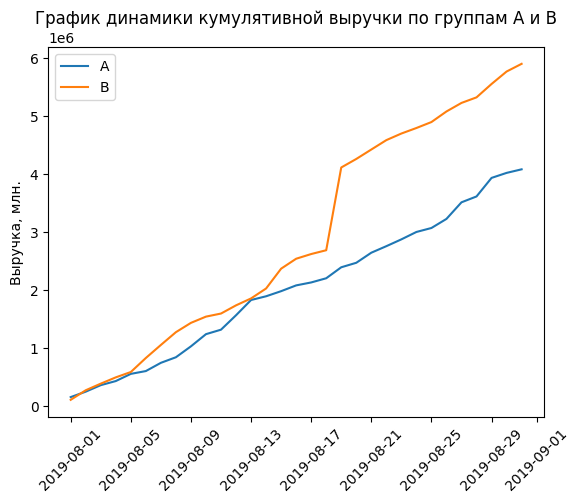

In [29]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData["group"] == "A"][
    ["date", "revenue", "orders"]
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData["group"] == "B"][
    ["date", "revenue", "orders"]
]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA["date"], cumulativeRevenueA["revenue"], label="A")

# Строим график выручки группы B
plt.plot(cumulativeRevenueB["date"], cumulativeRevenueB["revenue"], label="B")

plt.title('График динамики кумулятивной выручки по группам А и В')
plt.ylabel("Выручка, млн.")
plt.legend()
plt.xticks(rotation=45)
plt.show();

Выручка группы А растет равномерно, выручка группы В имеет резкую точку роста, что может свидетельствовать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

#### Средний чек по группам.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

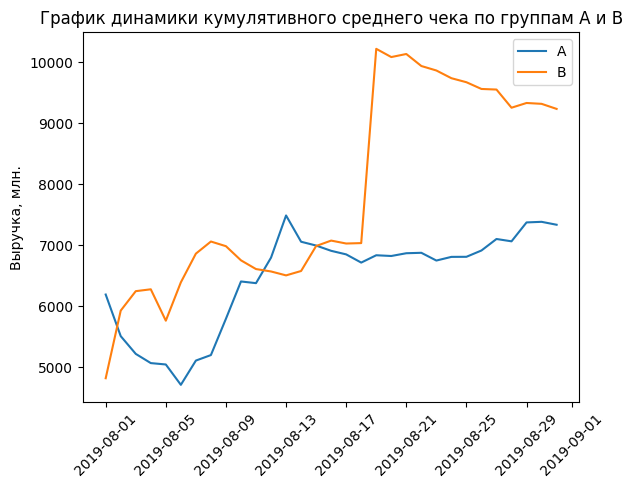

In [30]:
plt.plot(
    cumulativeRevenueA["date"],
    cumulativeRevenueA["revenue"] / cumulativeRevenueA["orders"],
    label="A",
)
plt.plot(
    cumulativeRevenueB["date"],
    cumulativeRevenueB["revenue"] / cumulativeRevenueB["orders"],
    label="B",
)
plt.title('График динамики кумулятивного среднего чека по группам А и В')
plt.ylabel("Выручка, млн.")
plt.legend()
plt.xticks(rotation=45)
plt.show();

Средний чек растет для обеих групп. Средний чек группы В показал резкий рывок, что говорит о дорогой покупке.

#### Относительное изменение среднего чека группы B к группе A

Построим график относительного различия для среднего чека.

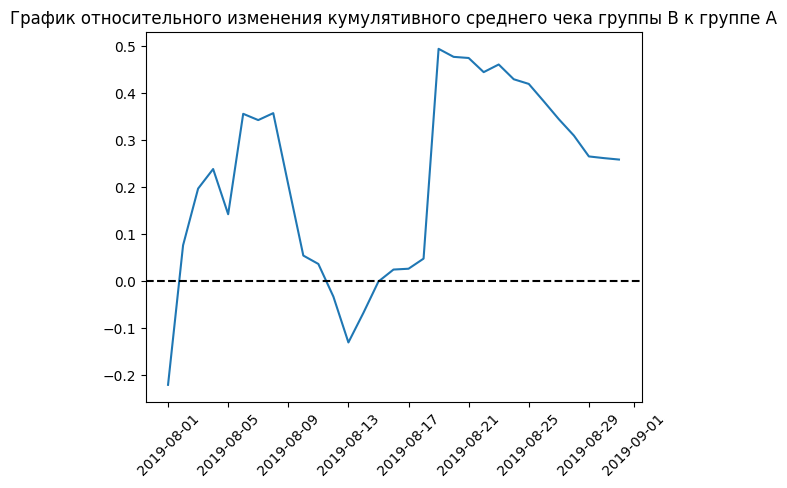

In [31]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on="date", right_on="date", how="left", suffixes=["A", "B"]
)

# cтроим отношение средних чеков
plt.plot(
    mergedCumulativeRevenue["date"],
    (mergedCumulativeRevenue["revenueB"] / mergedCumulativeRevenue["ordersB"])
    / (mergedCumulativeRevenue["revenueA"] / mergedCumulativeRevenue["ordersA"])
    - 1,
)
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

# добавляем ось X
plt.axhline(y=0, color="black", linestyle="--")
plt.show();

В нескольких точках график различия между сегментами резко «скачет», значит имеются особо крупные заказы и выбросы.

####  Среднее количество заказов на посетителя по группам

Аналогично проанализируем график кумулятивной конверсии.

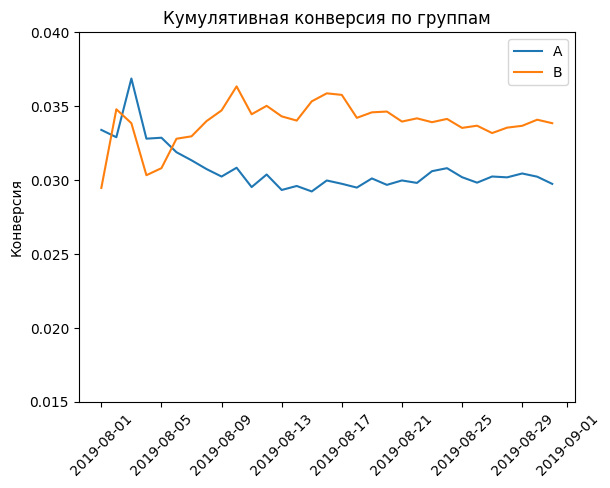

In [32]:
# считаем кумулятивную конверсию
cumulativeData["conversion"] = cumulativeData["orders"] / cumulativeData["visitors"]

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData["group"] == "A"]

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData["group"] == "B"]

# строим графики
plt.plot(cumulativeDataA["date"], cumulativeDataA["conversion"], label="A")
plt.plot(cumulativeDataB["date"], cumulativeDataB["conversion"], label="B")

plt.xticks(rotation=45)
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.ylabel('Конверсия')

# задаем масштаб осей
#plt.axis(['2019-08-01', '2019-08-31', 0.015, 0.04])
ax = plt.gca()
ax.set_ylim(0.015, 0.04)
plt.show()

Изначально группа А имела большую конверсию, чем группа В, но с течением времени конверсия группы В резко увеличилась, а конверсия группы А, наоборот, упала.

#### Относительное изменение среднего количества заказов на посетителя группы B к группе A

Построим график относительного различия кумулятивных конверсий:

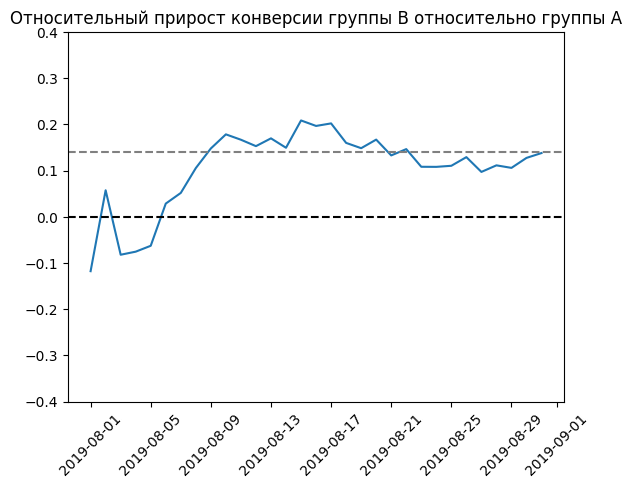

In [33]:
mergedCumulativeConversions = cumulativeDataA[["date", "conversion"]].merge(
    cumulativeDataB[["date", "conversion"]],
    left_on="date",
    right_on="date",
    how="left",
    suffixes=["A", "B"],
)

plt.plot(
    mergedCumulativeConversions["date"],
    mergedCumulativeConversions["conversionB"]
    / mergedCumulativeConversions["conversionA"]
    - 1,
)

plt.axhline(y= 0, color="black", linestyle="--")
plt.axhline(y= 0.14, color="grey", linestyle="--")
#plt.axis(['2019-08-01', '2019-08-31', -0.4, 0.4])
plt.xticks(rotation=45)
ax = plt.gca()
ax.set_ylim(-0.4, 0.4)
plt.title("Относительный прирост конверсии группы B относительно группы A")
plt.show();


В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но теперь постепенно растёт, в конце наблюдения имя прирост в 14% относительно группы А.

### Анализ количества заказов по пользователям и их стоимости

#### Количество заказов по пользователям

Пользователи, совершившие много заказов, влияют на числитель формулы конверсии. Скорее всего, их поведение отличается от нормального. Если речь не идёт об интернет-магазине с регулярным спросом, «обычный» пользователь совершает не больше двух заказов за короткий срок.

Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [34]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.sort_values(by = 'orders', ascending = False).head(6)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5


Есть пользователи, которые совершали от 5 до 11 заказов.

Построим точечную диаграмму числа заказов на одного пользователя:

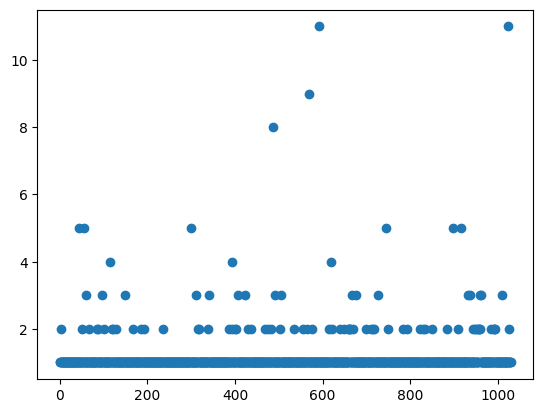

In [35]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

Много пользователей с 2-4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

#### 95-й и 99-й перцентили количества заказов на пользователя

Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [36]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей сделали 2 заказа и не более 1% пользователей сделало 4 и более заказов.

Выберем 4 заказа на одного пользователя за верхнюю границу числа заказов.

#### Оценка стоимости заказов.

Кроме аномального количества заказов, в данных могут присутствовать аномально дорогие заказы. Такие заказы так же будут влиять на средний чек.

In [37]:
orders.sort_values(by = 'revenue', ascending = False)

,orderId,userId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
...,...,...,...,...,...
933,3760662696,3577713868,2019-08-27,60,B
459,863448794,2738601405,2019-08-19,50,B
756,125335873,3423937755,2019-08-30,50,B
584,1126146019,2705308997,2019-08-20,50,A


Очевидно, судя по первым пяти строкам, в данных присутствуют аномально дорогие заказы.

Построим точечный график распределения стоимостей:

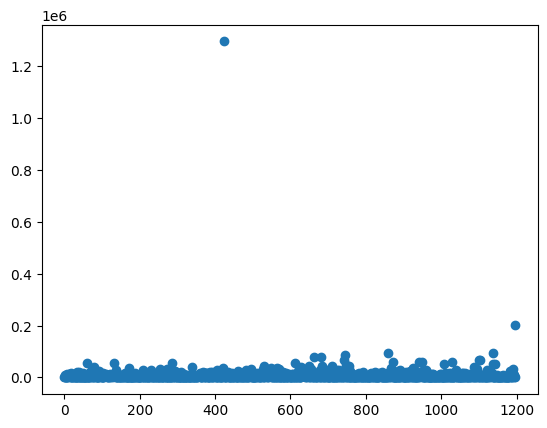

In [38]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

Данный график малоинформативен - здесь видно только два аномально высоких значения.

(0.0, 1200.0, 0.0, 150000.0)

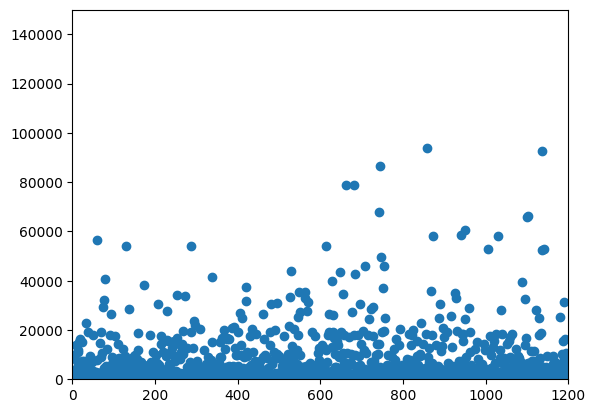

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1200, 0, 150000])

Ограничив максимальную стоимость заказа 150 тыс. рублями, можно увидеть, что стоимость большей части заказов до 40000 рублей.

#### 95-й и 99-й перцентили стоимости заказов.

Определим 95 и 99 перцентили среднего чека в выборке:

In [40]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не менее 95% заказов имеет стоимость до 28 тыс. руб и менее 1% заказов имеет стоимость выше 58233.2 рубля.

Примем за верхнюю границу стоимости заказов сумму в 58234 рубля.

### Анализ статистической значимости

#### статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы:   
**Нулевая**: различий в среднем количестве заказов между группами нет.   
**Альтернативная**: различия в среднем между группами есть.

In [41]:
visitorsADaily = visitors[visitors["group"] == "A"][["date", "visitors"]]
visitorsADaily.columns = ["date", "visitorsPerDateA"]

visitorsBDaily = visitors[visitors["group"] == "B"][["date", "visitors"]]
visitorsBDaily.columns = ["date", "visitorsPerDateB"]


ordersADaily = (
    orders[orders["group"] == "A"][["date", "orderId", "userId", "revenue"]]
    .groupby("date", as_index=False)
    .agg({"orderId": pd.Series.nunique, "revenue": "sum"})
)
ordersADaily.columns = ["date", "ordersPerDateA", "revenuePerDateA"]


ordersBDaily = (
    orders[orders["group"] == "B"][["date", "orderId", "userId", "revenue"]]
    .groupby("date", as_index=False)
    .agg({"orderId": pd.Series.nunique, "revenue": "sum"})
)
ordersBDaily.columns = ["date", "ordersPerDateB", "revenuePerDateB"]

Названия столбцов данных:

* `date` — дата;
* `ordersPerDateA` — количество заказов в выбранную дату в группе A;
* `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
* `ordersPerDateB` — количество заказов в выбранную дату в группе B;
* `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
* `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
* `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['userId', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [42]:
ordersByUsersA = (
    orders[orders["group"] == "A"]
    .groupby("userId", as_index=False)
    .agg({"orderId": pd.Series.nunique})
)
ordersByUsersA.columns = ["userId", "orders"]

ordersByUsersB = (
    orders[orders["group"] == "B"]
    .groupby("userId", as_index=False)
    .agg({"orderId": pd.Series.nunique})
)
ordersByUsersB.columns = ["userId", "orders"]

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [43]:
sampleA = pd.concat(
    [
        ordersByUsersA["orders"],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily["visitorsPerDateA"].sum() - len(ordersByUsersA["orders"])
            ),
            name="orders",
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB["orders"],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily["visitorsPerDateB"].sum() - len(ordersByUsersB["orders"])
            ),
            name="orders",
        ),
    ],
    axis=0,
)

Выведем относительный прирост среднего числа заказов группы B: `среднее число заказов группы B / среднее число заказов группы A - 1`.  Округлим до трёх знаков после запятой.

In [44]:
print("P-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост В к А: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительный прирост В к А: 0.138


По "сырым" данным различия в в среднем числе заказов между группами есть.
P-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 13.8%.

#### статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию `mannwhitneyu()` данные о выручке с заказов. 

In [45]:
print(
    "P-value: {0:.3f}".format(
        stats.mannwhitneyu(
            orders[orders["group"] == "A"]["revenue"],
            orders[orders["group"] == "B"]["revenue"],
        )[1]
    )
)
print(
    "Относительный прирост В к А: {0:.3f}".format(
        orders[orders["group"] == "B"]["revenue"].mean()
        / orders[orders["group"] == "A"]["revenue"].mean()
        - 1
    )
)


P-value: 0.729
Относительный прирост В к А: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B на 26% выше среднего чека группы A.

#### статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

"Очистим" данные, убрав аномальных пользователей.

Аномальными пользователями будем считать тех, кто совершил более 4 заказов и пользователей заказавших на сумму более 58234 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и 1% пользователей с дорогими заказами.

In [46]:
orders_amt_limit = np.percentile(ordersByUsers['orders'], 99)

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA["orders"] > orders_amt_limit]["userId"],
        ordersByUsersB[ordersByUsersB["orders"] > orders_amt_limit]["userId"],
    ],
    axis=0,
)

revenue_limit = np.percentile(orders['revenue'], 99)

usersWithExpensiveOrders = orders[orders["revenue"] > revenue_limit]["userId"]
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(1))
print(abnormalUsers.shape[0] , '- количество аномальных пользователей')

1099    148427295
Name: userId, dtype: int64
15 - количество аномальных пользователей


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [47]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [48]:
print("P-value: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный прирост В к А: {0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))


P-value: 0.014
Относительный прирост В к А: 0.153


На чистых данных разница между группами есть, а относительный прирост заказов группы В относительно группы А увеличился на 15%.

#### статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [49]:
print(
    'P-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост В к А: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.851
Относительный прирост В к А: -0.006


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. По разнице средних чеков групп различий практически нет.

## Выводы

Проанализировав данные, полученные интернет-магазином, можно сделать следующие выводы:

В части **приоритизации** гипотез для проведения последующего тестирования, стоит обратить внимания на следующие гипотезы:
* охват аудитории не важен:
    1. Запустить акцию, дающую скидку на товар в день рождения,
    2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,
    3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
* охват аудитории имеет значение:
    1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
    2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,
    3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

В части анализа A/B-теста:

* Есть статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий. Конверсия группы B выше, чем в A, на 15%;

* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. При этом средний чек группы B выше на ~2%;

* График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы B стабильно лучше группы A;

На основании вышеизложенного рекомендуем **остановить тест**, зафиксировав **победу группы B** (ее конверсия значительно выше конверсии группы A).